In [32]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
#Logistical Regression
from sklearn.linear_model import LogisticRegression


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, classification_report, precision_score, mean_squared_error, accuracy_score
from sklearn import preprocessing
from sklearn import neighbors

from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures


import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use("seaborn-v0_8") 

### Problem 2 Use logistic regression to predict the probability of default using income and balance. 
### Estimate the test error using

In [33]:
df = pd.read_csv('Default.csv', index_col = 0)

In [34]:
X = df[['balance', 'income']]
y = df['default']


df_ = pd.DataFrame(df)

In [50]:
# Note: factorize() returns two objects: a label array and an array with the unique values.
# We are only interested in the first object. 
df['default2'] = df.default.factorize()[0]  # Converts Yes and No to 0 and 1
df['student2'] = df.student.factorize()[0]  # Converts Yes and No to 0 and 1

df_['default2'] = df_.default.factorize()[0]

df.head()

,default,student,balance,income,default2,student2
1,No,No,729.526495,44361.62507,0,0
2,No,Yes,817.180407,12106.13470,0,1
3,No,No,1073.549164,31767.13895,0,0
4,No,No,529.250605,35704.49394,0,0
5,No,No,785.655883,38463.49588,0,0


### Data visualization

C:\Users\Baron\AppData\Local\Temp\ipykernel_24112\3404038247.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'default', y = 'balance', data=df,  orient='v', ax=ax2, palette=c_palette)
C:\Users\Baron\AppData\Local\Temp\ipykernel_24112\3404038247.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'default', y = 'income', data=df, orient='v', ax=ax3, palette=c_palette)


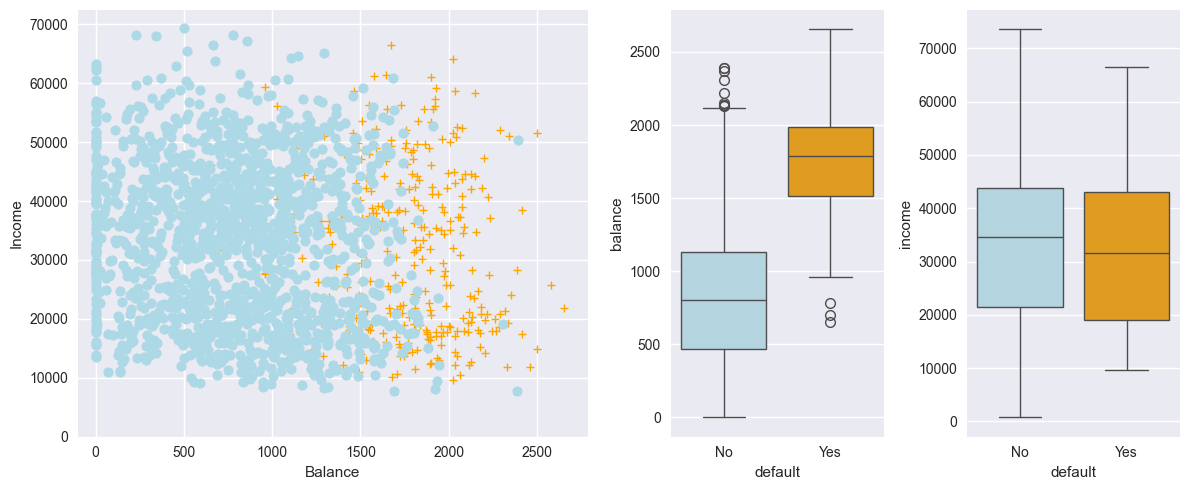

In [36]:
#SCATTER AND BOX PLOT

fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Take a fraction of the samples where target value (default) is 'no'
df_no = df[df.default2 == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df.default2 == 1]

#Concat function used instead of append
df_ = pd.concat([df_no, df_yes])

# Creating the plots with + and negative
ax1.scatter(df_[df_.default == 'Yes'].balance, df_[df_.default == 'Yes'].income, s=40, c='orange', marker='+',
            linewidths=1)
ax1.scatter(df_[df_.default == 'No'].balance, df_[df_.default == 'No'].income, s=40, c='lightblue', marker='o',
            linewidths=1)


#Labeling the Axis
ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')


#Plotting the box Plots 
c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot(x = 'default', y = 'balance', data=df,  orient='v', ax=ax2, palette=c_palette)
sns.boxplot(x = 'default', y = 'income', data=df, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())

In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   default   10000 non-null  object 
 1   student   10000 non-null  object 
 2   balance   10000 non-null  float64
 3   income    10000 non-null  float64
 4   default2  10000 non-null  int64  
 5   student2  10000 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 546.9+ KB


### LOGISTICAL REGRESSION

In [38]:
# LOGISTICAL REGRESSION
#establish y output:
y = df.default2

# Assert x train input
X_train = df.balance.values.reshape(-1,1)

# Using newton-cg solver, the coefficients are equal/closest to the ones in the book. 
clf = skl_lm.LogisticRegression(solver='newton-cg')

#fit the output
clf.fit(X_train,y)

y_pred = clf.predict(X_train)

print('----------------------------------------------------------------------------------') 
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)
print('----------------------------------------------------------------------------------') 
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)
print('----------------------------------------------------------------------------------') 
#print classification report
print('\n') 
print('Double check this classification report')
print(classification_report(y, y_pred, target_names=['No', 'Yes']))
print('----------------------------------------------------------------------------------')

print('Calculated RSS:' )
print('----------------------------------------------------------------------------------') 

----------------------------------------------------------------------------------
LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[0.00546217]]
intercept : [-10.59003277]
----------------------------------------------------------------------------------
Accuracy: 0.9725
----------------------------------------------------------------------------------


Double check this classification report
              precision    recall  f1-score   support

          No       0.98      1.00      0.99      9667
         Yes       0.70      0.30      0.42       333

    accuracy                           0.97     10000
   macro avg       0.84      0.65      0.70     10000
weighted avg       0.97      0.97      0.97     10000

----------------------------------------------------------------------------------
Calculated RSS:
----------------------------------------------------------------------------------


In [39]:
print('----------------------------------------------------------------------------------') 
confusion_matrix(y, y_pred)

df.groupby(['student','default']).size().unstack('default')


----------------------------------------------------------------------------------


default,No,Yes
student,,
No,6850,206
Yes,2817,127


### MULITPLE LOGISTICAL REGRESSION


In [40]:
# MULITPLE LOGISTICAL REGRESSION

X_train_mlogreg = sm.add_constant(df[['balance', 'income', 'student2']])

est_mlogreg = smf.logit("default2 ~ balance + income + student2", data = df).fit()

est_mlogreg.summary2().tables[1]

y_pred_prob = est_mlogreg.predict(X_train_mlogreg)

y_pred_mult = [ 0 if x < 0.5 else 1 for x in y_pred_prob] # This  sets the threshold bondaries for the classification solutions

print('----------------------------------------------------------------------------------') 
print(clf)
#print('classes: ',est_mlogreg.classes_)   These are not attributes of the logit function...
#print('coefficients: ',est_mlogreg.coef_)  These are not attributes of the logit function...
#print('intercept :', est_mlogreg.intercept_)  These are not attributes of the logit function...
print('----------------------------------------------------------------------------------') 
accuracy = accuracy_score(y, y_pred_mult)
print("Accuracy:", accuracy)
print('----------------------------------------------------------------------------------') 
#print classification report
print('\n') 
print('Double check this classification report')
print(classification_report(y, y_pred_mult, target_names=['No', 'Yes']))


Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
----------------------------------------------------------------------------------
LogisticRegression(solver='newton-cg')
----------------------------------------------------------------------------------
Accuracy: 0.9732
----------------------------------------------------------------------------------


Double check this classification report
              precision    recall  f1-score   support

          No       0.98      1.00      0.99      9667
         Yes       0.72      0.32      0.44       333

    accuracy                           0.97     10000
   macro avg       0.85      0.66      0.71     10000
weighted avg       0.97      0.97      0.97     10000



In [41]:
confusion_matrix(y, y_pred_mult)

df.groupby(['student','default']).size().unstack('default')

default,No,Yes
student,,
No,6850,206
Yes,2817,127


### Cross Validation: Validation Set Approach


In [42]:
t_prop = 0.5 # Splits the data in half
r_state = np.arange(10000, 10000) # 0 through 10 random seeds array of 0 - 9


#Assert the type of training model


# Validation Set Apprarch
#Shuffle Data
#Split it into two
X_train, X_test, y_train, y_test = train_test_split(X, df.default2, shuffle=True, test_size=t_prop, random_state=42)

#Assert classifier method
clf = skl_lm.LogisticRegression(solver='newton-cg')

clf.fit(X_train, y_train)

y_pred_CV1 = clf.predict(X_test)

MSE = mean_squared_error(y_test, y_pred_CV1)
print('----------------------------------------------------------------------------------')
print('MSE:' , MSE)
print('----------------------------------------------------------------------------------')



----------------------------------------------------------------------------------
MSE: 0.0258
----------------------------------------------------------------------------------


### More stats

In [43]:
print('----------------------------------------------------------------------------------') 
print(clf)
#print('classes: ',est_mlogreg.classes_)   These are not attributes of the logit function...
#print('coefficients: ',est_mlogreg.coef_)  These are not attributes of the logit function...
#print('intercept :', est_mlogreg.intercept_)  These are not attributes of the logit function...
print('----------------------------------------------------------------------------------') 
accuracy = accuracy_score(y_test, y_pred_CV1)
print("Accuracy:", accuracy)
print('----------------------------------------------------------------------------------') 
#print classification report
print('\n') 
print('Double check this classification report')
print(classification_report(y_test, y_pred_CV1, target_names=['No', 'Yes']))

----------------------------------------------------------------------------------
LogisticRegression(solver='newton-cg')
----------------------------------------------------------------------------------
Accuracy: 0.9742
----------------------------------------------------------------------------------


Double check this classification report
              precision    recall  f1-score   support

          No       0.98      1.00      0.99      4841
         Yes       0.70      0.33      0.45       159

    accuracy                           0.97      5000
   macro avg       0.84      0.66      0.72      5000
weighted avg       0.97      0.97      0.97      5000



### LOOCV CV

In [57]:
# LOOCV CV
p_order = np.arange(1,10000)

X_loocv = X.values

y = df.default2

loo = LeaveOneOut()
loo.get_n_splits(X_loocv)
scores = list()

score = cross_val_score(clf, X_loocv, y, cv=loo, scoring='neg_mean_squared_error', n_jobs = -1).mean()
scores.append(score)

print('----------------------------------------------------------------------------------')
print('Training model used: Logistical Regression')
print('----------------------------------------------------------------------------------')
print('MSE:')
scores


----------------------------------------------------------------------------------
Training model used: Logistical Regression
----------------------------------------------------------------------------------
MSE:


[-0.0263]

### K_Fold CV

In [58]:
folds = 5
elements = len(X.index)

#Assert y
y = df['default2']

clf = LogisticRegression(multi_class='auto', solver='liblinear')

kf_10 = KFold(n_splits=folds)

ERROR = cross_val_score(clf, X, y, cv=kf_10, scoring='neg_mean_squared_error', n_jobs = -1).mean()   

ERROR_non_neg = ERROR * -1

ERROR_non_neg

0.033600000000000005